In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud

In [14]:
train = pd.read_csv('../input/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('../input/tmdb-box-office-prediction/test.csv')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [16]:
test["revenue"] = np.nan
data = train.append(test,ignore_index=True)

In [17]:
data.describe()

,id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


Total Size of dataset: 7398


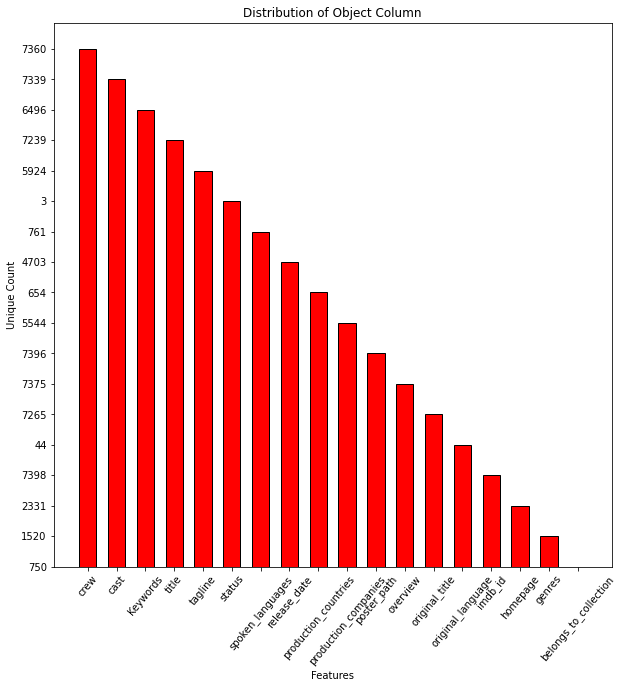

In [18]:
# Lets see the Unique Value Distribution of Object features
Object_col = data.select_dtypes('object').columns
Analysis = []

for columns in Object_col:
    Unique = data[columns].nunique()
    Analysis.append([str(columns),Unique])

Analysis = np.array(Analysis)
plt.figure(figsize = (10,10))
plt.bar(x = Analysis[:,0],height = Analysis[:,1],width = 0.6,color = "red",edgecolor = "black")
plt.gca().invert_xaxis()
plt.xlabel("Features")
plt.ylabel("Unique Count")
plt.title("Distribution of Object Column")
plt.xticks(rotation = 50)
print("Total Size of dataset: {}".format(len(data)))


In [19]:
# Lets Deal with Every category one by one
object_columns = data.select_dtypes('object').columns
print(object_columns)

Index(['belongs_to_collection', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast',
       'crew'],
      dtype='object')


**Lets Deal with "belongs_to_collection" first.**

In [20]:
for idx,instance in enumerate(data.loc[:3,'belongs_to_collection']):
    print(idx,instance)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 nan
3 nan


In [21]:
# Lets Extract out the names and make it as feature
Value = []
for instance in data.loc[:,'belongs_to_collection']:
    if isinstance(instance,str):  # Because nan in float instance and rest is string instance
        Value.append(ast.literal_eval(instance)[0]['name'])  # Extracting out the name
    else:
        Value.append(np.nan)

In [22]:
data['belongs_to_collection'] = Value

In [23]:
data['belongs_to_collection'].head(5)

0    Hot Tub Time Machine Collection
1    The Princess Diaries Collection
2                                NaN
3                                NaN
4                                NaN
Name: belongs_to_collection, dtype: object

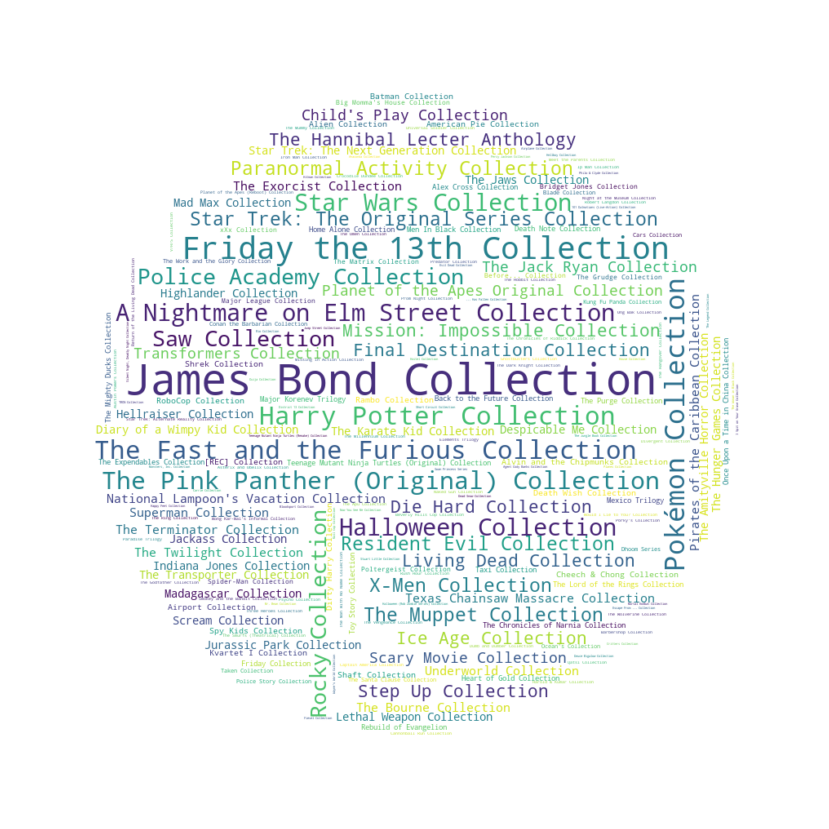

In [24]:
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)
Count = data['belongs_to_collection'].value_counts()
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color="white",width=1920, height=1080,mask = mask).generate_from_frequencies(Count)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Lets deal with 'Genre' Now:**

In [25]:
for idx,instance in enumerate(data.loc[:10,'genres']):
    print(idx,instance)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
5 [{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]
6 [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]
7 [{'id': 99, 'name': 'Documentary'}]
8 [{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]
9 [{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}]
10 [{'id': 18, 'name': 'Drama'}]


In [26]:
# Lets Extract out the name first
Value = []
Count = []
for instance in data.loc[:,'genres']:
    if isinstance(instance,str):
        X = ast.literal_eval(instance)
        Count.append(len(X))   # Count Keep tracks of total Genres of One Movie
        for i in X:
            Value.append(str(i['name']))
    else:
        Count.append(0)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


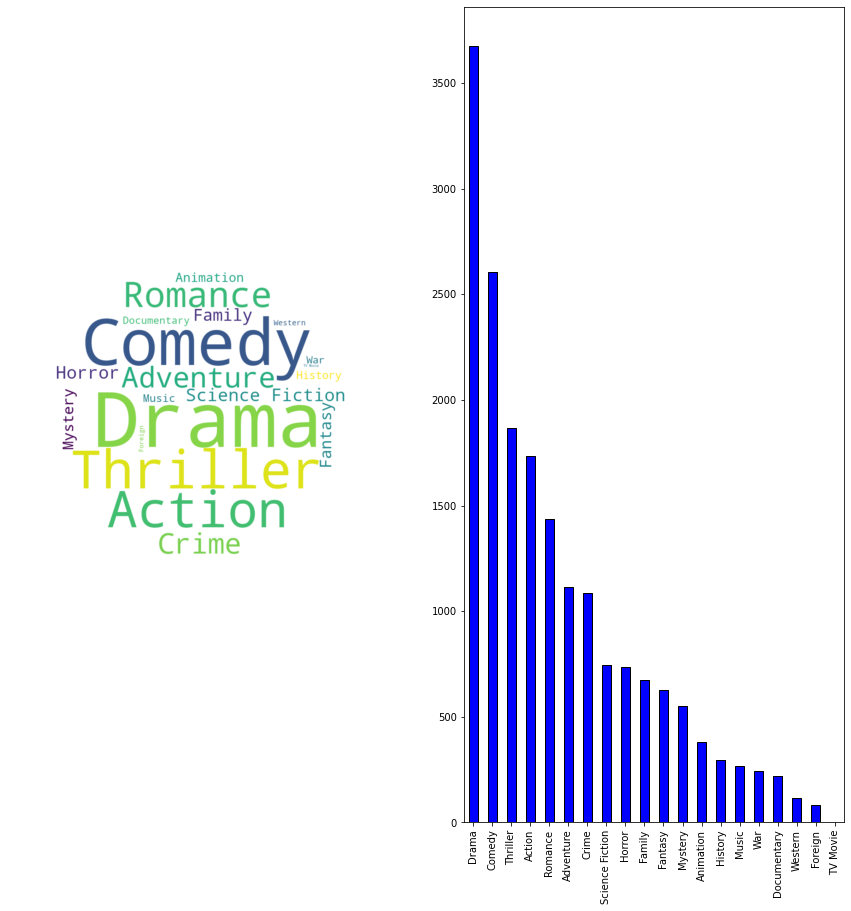

In [27]:
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

Total_Genre = pd.DataFrame(Value).value_counts()
Total_Genre.index = ['Drama','Comedy','Thriller','Action','Romance','Adventure','Crime','Science Fiction',
                     'Horror','Family','Fantasy','Mystery','Animation','History','Music','War','Documentary',
                     'Western','Foreign','TV Movie']

plt.figure(figsize = (15,15))
plt.subplot(121)
wordcloud = WordCloud(background_color="white",mask=mask,width=2000, height=1180).generate_from_frequencies(Total_Genre)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

plt.subplot(122)
Total_Genre.plot(kind = 'bar',color = 'blue',edgecolor = 'black')
plt.show()

# Drama And Comedy are the most Repeating ones

In [28]:
data['genres'] = Count

**Lets Deal with "homepage" now.**

In [29]:
for idx,instance in enumerate(data.loc[:10,'homepage']):
    print(idx,instance)

0 nan
1 nan
2 http://sonyclassics.com/whiplash/
3 http://kahaanithefilm.com/
4 nan
5 nan
6 http://www.thepossessionmovie.com/
7 nan
8 nan
9 nan
10 nan


In [30]:
data['homepage'].value_counts()   # This we can Remove. Because its given in dataset description that
# even though two different movies have same homepage they must be considered as two different movies.

http://www.thehungergames.movie/                            4
http://www.transformersmovie.com/                           4
http://www.missionimpossible.com/                           4
http://www.kungfupanda.com/                                 3
http://www.workandtheglory.com/                             3
                                                           ..
http://www.sonyclassics.com/thewackness/                    1
http://www.teamamerica.com                                  1
http://www.threemusketeers-movie.com/                       1
http://movies.disney.com/snow-white-and-the-seven-dwarfs    1
https://www.warnerbros.com/tmnt                             1
Name: homepage, Length: 2331, dtype: int64

In [31]:
data.drop(['homepage'],axis = 1,inplace = True)

**Lets Deal with "homepage" now:**

In [32]:
for idx,instance in enumerate(data.loc[:10,'imdb_id']):
    print(idx,instance)

0 tt2637294
1 tt0368933
2 tt2582802
3 tt1821480
4 tt1380152
5 tt0093743
6 tt0431021
7 tt0391024
8 tt0117110
9 tt0310281
10 tt0075148


In [33]:
data['imdb_id'].value_counts()       # All Unique Value We can Remove this attribute.
print(np.any(np.array(data['imdb_id'].value_counts()) == 1))

True


In [34]:
data.drop(['imdb_id'],axis = 1,inplace = True)

**Lets Deal with "Original language" now:**

In [35]:
for idx,instance in enumerate(data.loc[:5,'original_language']):
    print(idx,instance)

0 en
1 en
2 en
3 hi
4 ko
5 en


In [36]:
data['original_language'].value_counts().head(5)    # We can simply use Linear Encoding in here

en    6351
fr     199
hi     118
ru     109
es      95
Name: original_language, dtype: int64

In [37]:
for idx,instance in enumerate(data.loc[:10,'original_title']):
    print(idx,instance)

0 Hot Tub Time Machine 2
1 The Princess Diaries 2: Royal Engagement
2 Whiplash
3 Kahaani
4 마린보이
5 Pinocchio and the Emperor of the Night
6 The Possession
7 Control Room
8 Muppet Treasure Island
9 A Mighty Wind
10 Rocky


In [38]:
data['original_title'].value_counts()  # I can remove this same reason for homepage

King Kong          3
Hercules           3
Anna Karenina      3
Logan              2
Fright Night       2
                  ..
Meet Joe Black     1
The Uninvited      1
Thief              1
Brick Mansions     1
The Incredibles    1
Name: original_title, Length: 7265, dtype: int64

In [39]:
data.drop(['original_title'],axis = 1,inplace = True)

In [40]:
for idx,instance in enumerate(data.loc[:1,'overview']):
    print(idx,instance)

0 When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.
1 Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...


In [41]:
data.drop(['overview'],axis = 1,inplace = True)

**Lets see "poster_path" now:**

In [42]:
for idx,instance in enumerate(data.loc[:1,'poster_path']):
    print(idx,instance)

0 /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1 /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg


In [43]:
data['poster_path'].value_counts()      # All Unique Value We can Remove this attribute.
print(np.any(np.array(data['poster_path'].value_counts()) == 1))

True


In [44]:
data.drop(['poster_path'],axis = 1,inplace = True)

In [45]:
for idx,instance in enumerate(data.loc[:10,'production_companies']):
    print(idx,instance)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan
5 nan
6 [{'name': 'Ghost House Pictures', 'id': 768}, {'name': 'North Box Productions', 'id': 22637}]
7 nan
8 [{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Jim Henson Productions', 'id': 2504}, {'name': 'Jim Henson Company, The', 'id': 6254}]
9 [{'name': 'Castle Rock Entertainment', 'id': 97}]
10 [{'name': 'United Artists', 'id': 60}]


In [46]:
# Lets Extract out the name first
Value = []
Count = []
for instance in data.loc[:,'production_companies']:
    if isinstance(instance,str):
        X = ast.literal_eval(instance)
        Count.append(len(X))   # Count Keep tracks of total Production Companirs of One Movie
        for i in X:
            Value.append(str(i['name']))
    else:
        Count.append(0)

In [47]:
pd.DataFrame(Value).value_counts().index[:5] # We have to work on it and bring in right format

MultiIndex([(                          'Warner Bros.',),
            (                    'Universal Pictures',),
            (                    'Paramount Pictures',),
            ('Twentieth Century Fox Film Corporation',),
            (                     'Columbia Pictures',)],
           )

In [48]:
Correct_index = []
for index in pd.DataFrame(Value).value_counts().index:
    Correct_index.append(index[0])
print(Correct_index[:5])

['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures']


(-0.5, 999.5, 999.5, -0.5)

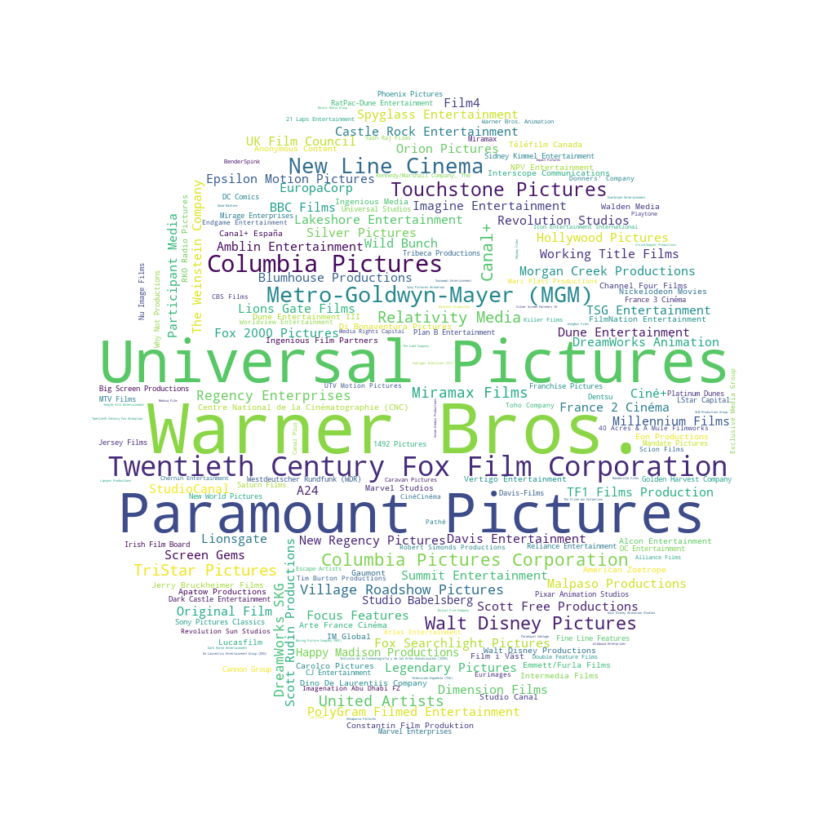

In [49]:
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

companies = pd.DataFrame(Value).value_counts()
companies.index = Correct_index

plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color="white",mask=mask,width=2000, height=1180).generate_from_frequencies(companies)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

# Most pictures are from Paramount Pictures,Warner Bors and Universal Pictures

In [50]:
data['production_companies'] = Count

**Lets See "production_countries" now**

In [51]:
for idx,instance in enumerate(data.loc[:10,'production_countries']):
    print(idx,instance)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
5 nan
6 [{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]
7 nan
8 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
9 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
10 [{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [52]:
# Same treatment we can give it as above
# Lets Extract out the name first
Value = []
Count = []
for instance in data.loc[:,'production_countries']:
    if isinstance(instance,str):
        X = ast.literal_eval(instance)
        Count.append(len(X))   # Count Keep tracks of total Production Countries of One Movie
        for i in X:
            Value.append(str(i['name']))
    else:
        Count.append(0)

In [53]:
Value = pd.DataFrame(Value).rename(columns = {0:"Name"})
df = Value.value_counts()

Text(0, 0.5, 'Count of Total Movies')

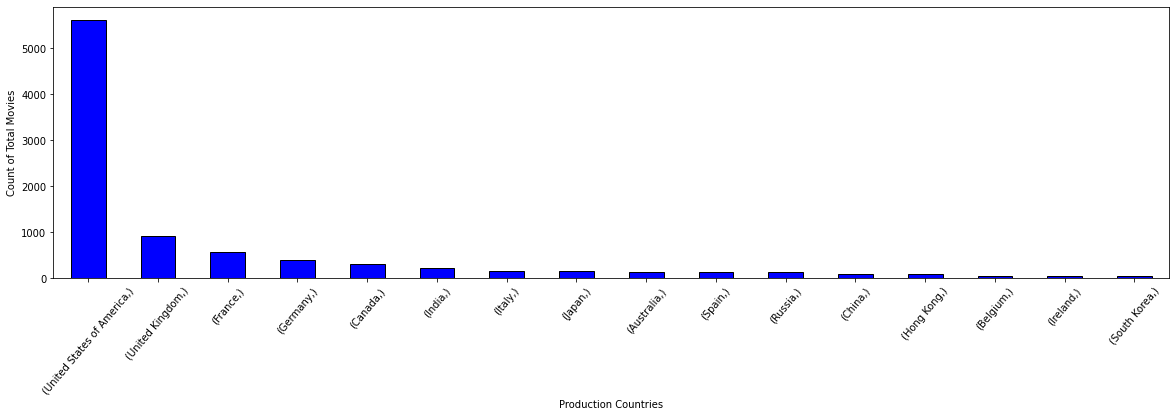

In [54]:
df.loc[df > 50].plot(kind = "bar",color = "blue",edgecolor = "black",figsize = (20,5)) 
plt.xticks(rotation = 50)
plt.xlabel("Production Countries")
plt.ylabel("Count of Total Movies")
# Plotting the the Countries who created more than 50 movies

In [55]:
data['production_countries'] = Count

**Dealing with "release_date" attribute:**

In [56]:
for idx,instance in enumerate(data.loc[:20,'release_date']):
    print(idx,instance)

0 2/20/15
1 8/6/04
2 10/10/14
3 3/9/12
4 2/5/09
5 8/6/87
6 8/30/12
7 1/15/04
8 2/16/96
9 4/16/03
10 11/21/76
11 7/10/87
12 9/15/99
13 3/4/05
14 6/20/02
15 10/6/10
16 8/4/05
17 12/25/13
18 2/2/11
19 8/2/05
20 4/3/98


In [57]:
data['release_date'] = pd.to_datetime(data['release_date'],format="%m/%d/%y")

# format ==> https://strftime.org/

In [58]:
data['release_date'].head(10)

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
5   1987-08-06
6   2012-08-30
7   2004-01-15
8   1996-02-16
9   2003-04-16
Name: release_date, dtype: datetime64[ns]

In [59]:
for idx,instance in enumerate(data.loc[:5,'spoken_languages']):
    print(idx,instance)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
5 [{'iso_639_1': 'en', 'name': 'English'}]


In [60]:
# We can Do same treatment as Earlier
# Lets Extract out the name first
Value = []
Count = []
for instance in data.loc[:,'spoken_languages']:
    if isinstance(instance,str):
        X = ast.literal_eval(instance)
        Count.append(len(X))   # Count Keep tracks of total Languages of One Movie
        for i in X:
            Value.append(str(i['name']))
    else:
        Count.append(0)

In [61]:
Value[:5]

['English', 'English', 'English', 'English', 'हिन्दी']

In [62]:
Correct_index = []
for index in pd.DataFrame(Value).value_counts().index:
    Correct_index.append(index[0])
print(Correct_index[:5])

['English', 'Français', 'Español', 'Deutsch', 'Pусский']


(-0.5, 999.5, 999.5, -0.5)

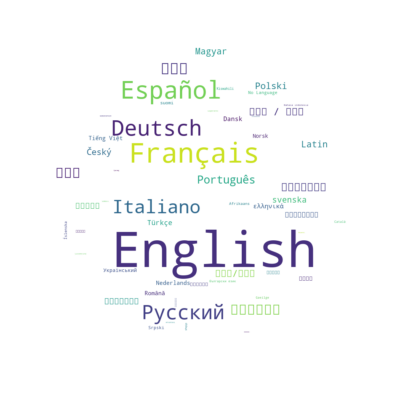

In [63]:
x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

Lang = pd.DataFrame(Value).value_counts()
Lang.index = Correct_index

plt.figure(figsize = (7,7))
wordcloud = WordCloud(background_color="white",mask=mask,width=2000, height=1180).generate_from_frequencies(Lang)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

# Most pictures are in English,Francais,Espanol usw

In [64]:
data['spoken_languages'] = Count

In [65]:
for idx,instance in enumerate(data.loc[:5,'status']):
    print(idx,instance)         # We can simply do Label Encoding in it

0 Released
1 Released
2 Released
3 Released
4 Released
5 Released


In [66]:
for idx,instance in enumerate(data.loc[:5,'tagline']):
    print(idx,instance)

0 The Laws of Space and Time are About to be Violated.
1 It can take a lifetime to find true love; she's got 30 days!
2 The road to greatness can take you to the edge.
3 nan
4 nan
5 nan


In [67]:
data.drop(['tagline'],inplace = True,axis = 1)

In [68]:
for idx,instance in enumerate(data.loc[:5,'title']):
    print(idx,instance)

0 Hot Tub Time Machine 2
1 The Princess Diaries 2: Royal Engagement
2 Whiplash
3 Kahaani
4 Marine Boy
5 Pinocchio and the Emperor of the Night


In [69]:
data['title'].value_counts() 
# We can remove it as I said earlier even though Ghost has 3 instances all must be treated as differnt. So meaning this attribute is Unique.

Ghost                                     3
Beauty and the Beast                      3
Anna Karenina                             3
Hercules                                  3
King Kong                                 3
                                         ..
Agent Cody Banks 2: Destination London    1
Born into Brothels                        1
Torremolinos 73                           1
Blue Crush                                1
The Secret in Their Eyes                  1
Name: title, Length: 7239, dtype: int64

In [70]:
data.drop(['title'],inplace = True,axis = 1)

In [71]:
for idx,instance in enumerate(data.loc[:5,'Keywords']):
    print(idx,instance)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [72]:
# We can Do same treatment as Earlier

Count = []
for instance in data.loc[:,'Keywords']:
    if isinstance(instance,str):
        X = ast.literal_eval(instance)
        Count.append(len(X))   # Count Keep tracks of total Keywords of One Movie
    else:
        Count.append(0)

In [73]:
data['Keywords'] = Count

In [74]:
for idx,instance in enumerate(data.loc[:1,'cast']):
    print(idx,instance)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

In [75]:
# We can Do same treatment as Earlier

Count = []
for instance in data.loc[:,'cast']:
    if isinstance(instance,str):
        X = ast.literal_eval(instance)
        Count.append(len(X))   # Count Keep tracks of total casts of One Movie
    else:
        Count.append(0)

In [76]:
data['cast'] = Count

In [77]:
for idx,instance in enumerate(data.loc[:1,'crew']):
    print(idx,instance)

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [78]:
# We can Do same treatment as Earlier

Count = []
for instance in data.loc[:,'crew']:
    if isinstance(instance,str):
        X = ast.literal_eval(instance)
        Count.append(len(X))   # Count Keep tracks of total crew of One Movie
    else:
        Count.append(0)

In [79]:
data['crew'] = Count

In [80]:
data.describe()

,id,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,Keywords,cast,crew,revenue
count,7398.000000,7.398000e+03,7398.000000,7398.000000,7398.000000,7398.000000,7392.000000,7398.000000,7398.000000,7398.000000,7398.000000,3.000000e+03
mean,3699.500000,2.260146e+07,2.495539,8.514968,2.744526,1.332793,107.717262,1.446067,7.243039,20.956204,24.275480,6.672585e+07
std,2135.762978,3.694867e+07,1.119068,12.165794,2.186800,0.790359,21.480040,0.894305,6.254883,17.446726,28.139666,1.375323e+08
min,1.000000,0.000000e+00,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,2.000000,3.933124,1.000000,1.000000,94.000000,1.000000,3.000000,11.000000,8.000000,2.379808e+06
50%,3699.500000,7.500000e+06,2.000000,7.435844,2.000000,1.000000,104.000000,1.000000,6.000000,16.000000,14.000000,1.680707e+07
75%,5548.750000,2.800000e+07,3.000000,10.920002,4.000000,1.000000,118.000000,2.000000,10.000000,24.000000,28.000000,6.891920e+07
max,7398.000000,3.800000e+08,8.000000,547.488298,26.000000,12.000000,338.000000,9.000000,149.000000,165.000000,194.000000,1.519558e+09


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     7398 non-null   int64         
 1   belongs_to_collection  1481 non-null   object        
 2   budget                 7398 non-null   int64         
 3   genres                 7398 non-null   int64         
 4   original_language      7398 non-null   object        
 5   popularity             7398 non-null   float64       
 6   production_companies   7398 non-null   int64         
 7   production_countries   7398 non-null   int64         
 8   release_date           7397 non-null   datetime64[ns]
 9   runtime                7392 non-null   float64       
 10  spoken_languages       7398 non-null   int64         
 11  status                 7396 non-null   object        
 12  Keywords               7398 non-null   int64         
 13  cas

In [82]:
# Lets see Null values Now.
Null_Values = pd.DataFrame(data.isnull().sum()).rename(columns = {0:'Total'})
Null_Values['Percent'] = Null_Values['Total']/len(data)
Null_Values.sort_values('Percent',ascending=False).head()

,Total,Percent
belongs_to_collection,5917,0.799811
revenue,4398,0.594485
runtime,6,0.000811
status,2,0.000270
release_date,1,0.000135


In [83]:
# Lets Manually first store the index where Null values are present becasue Label Encoding will also encode Null values
index = list(Null_Values[Null_Values['Total'] >= 1].index)
index.remove('revenue')
Position = []
for col in index:
    temp = data[data[col].isnull()].index
    Position.append([col,temp])   

In [84]:
from sklearn.preprocessing import LabelEncoder
# Lets Apply Label Encoding to object Columns
Object_Columns = data.select_dtypes('object').columns
data[Object_Columns] = data.select_dtypes('object').apply(LabelEncoder().fit_transform)

In [85]:
for instance in Position:
    data.loc[instance[1],instance[0]] = np.nan

In [86]:
# Extracting day,month,year,and quarter of the year
data['Release_month'] = data['release_date'].dt.month
data['Release_Year'] = data['release_date'].dt.year
data['Release_Day'] = data['release_date'].dt.day
data['Release_Quarter'] = data['release_date'].dt.quarter
data.drop(['release_date'],axis = 1,inplace = True)

In [87]:
# First Lets Compress our dataset
def Reduce_Me(dataset):
    Initial = data.memory_usage().sum()/ 1024**2
    print("Initial Memory : {:.2f} MB".format(Initial))
    Columns = dataset.columns
    for column in Columns:
        Dtype = str(data[column].dtype)
        
        min_ = data[column].min()
        max_ = data[column].max()
            
        if 'int' in Dtype:
            if min_ > np.iinfo(np.int8).min and max_ < np.iinfo(np.int8).max:
                data[column] = data[column].astype(np.int8)
            elif min_ > np.iinfo(np.int16).min and max_ < np.iinfo(np.int16).max:
                data[column] = data[column].astype(np.int16)
            elif min_ > np.iinfo(np.int32).min and max_ < np.iinfo(np.int32).max:
                data[column] = data[column].astype(np.int32)
            elif min_ > np.iinfo(np.int64).min and max_ < np.iinfo(np.int64).max:
                data[column] = data[column].astype(np.int64)
        else:
            if min_ > np.finfo(np.float16).min and max_ < np.finfo(np.float16).max:
                data[column] = data[column].astype(np.float16)
            elif min_ > np.finfo(np.float32).min and max_ < np.finfo(np.float32).max:
                data[column] = data[column].astype(np.float32)
            elif min_ > np.finfo(np.float64).min and max_ < np.finfo(np.float64).max:
                data[column] = data[column].astype(np.float64)
    Final = data.memory_usage().sum()/1024**2
    print("Final Memory : {:.2f} MB".format(Final))
    print("Reduced By: {:.2f}%".format((Initial-Final)/Initial * 100))
    return dataset


In [88]:
data.drop(['id'],inplace = True,axis = 1)
data = Reduce_Me(data)

Initial Memory : 1.02 MB
Final Memory : 0.25 MB
Reduced By: 75.69%


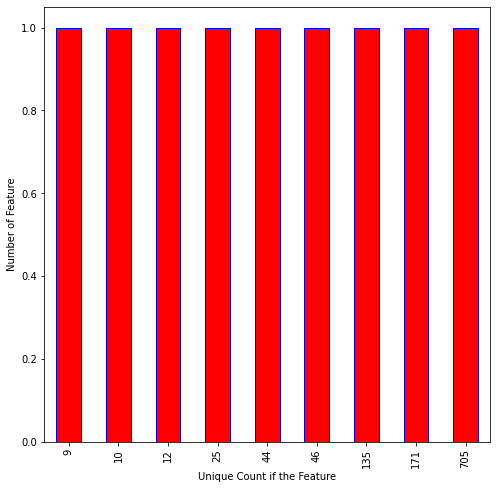

In [89]:
# Lets see how many Unique Values are there in Integer columns
Integer_Columns = [col for col in data if 'int' in str(data[col].dtypes)]
data[Integer_Columns].nunique().value_counts().sort_index().plot(kind = 'bar',figsize = (8,8),edgecolor = 'blue',color = 'red')
plt.xlabel('Unique Count if the Feature')
plt.ylabel('Number of Feature')
plt.show()

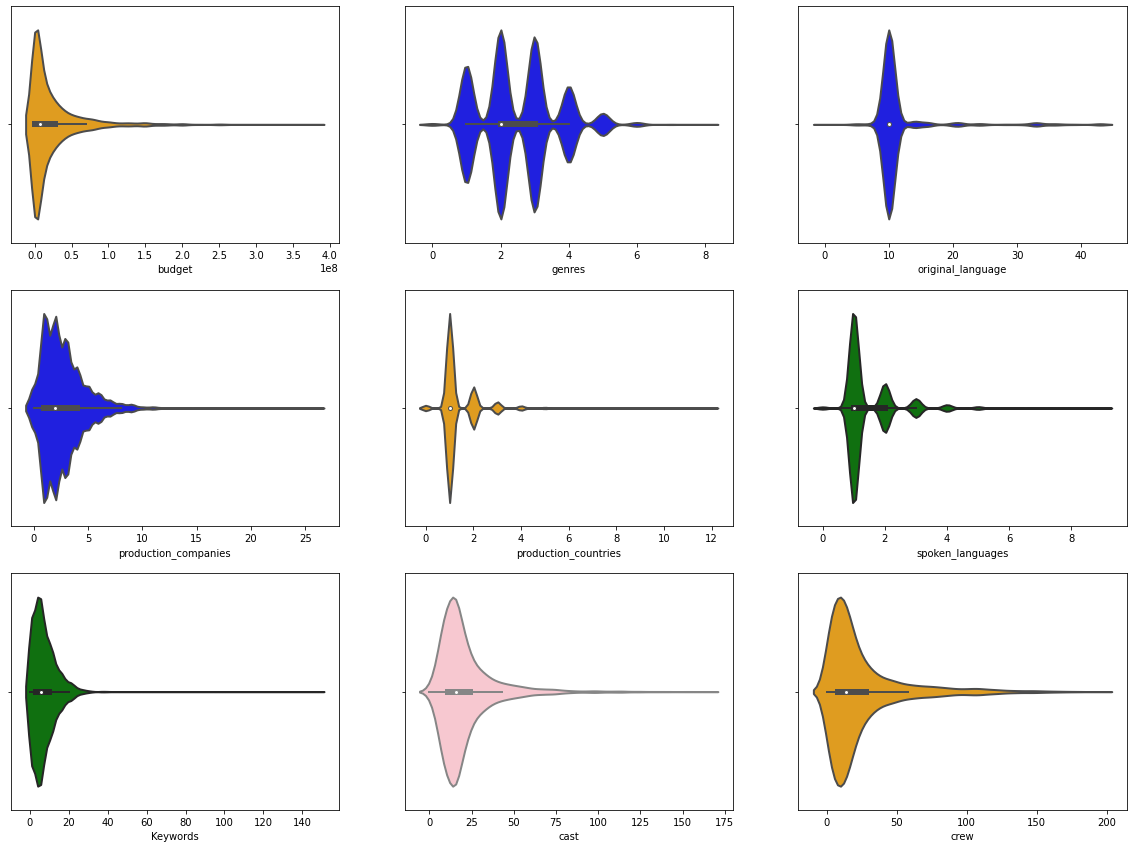

In [90]:
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)

# Lets See the Distribution of Each of them
import seaborn as sns
plt.figure(figsize=(20,20))
color = ['red','green','blue','orange','pink','yellow']
for idx,col in enumerate(Integer_Columns):
    ax = plt.subplot(4,3,idx+1)
    color_idx = np.random.randint(0,len(color))
    sns.violinplot(data[col],ax=ax,color=color[color_idx],linewidth=2)

    
# Its clear that the datapoints are highly skewed. We will see later if we should apply some transformations on it

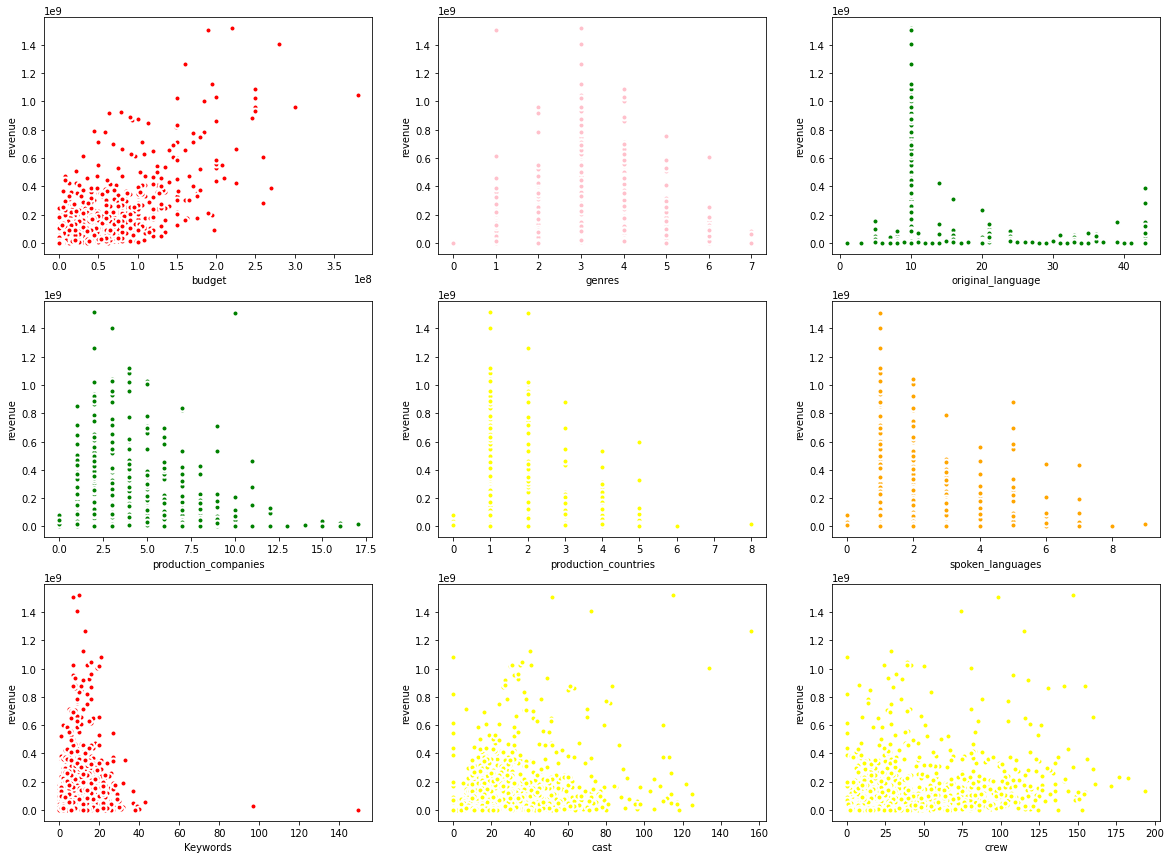

In [91]:
# Lets see how they are related to our target Variable
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)

# Lets See the Distribution of Each of them
import seaborn as sns
plt.figure(figsize=(20,20))
color = ['red','green','blue','orange','pink','yellow']
for idx,col in enumerate(Integer_Columns):
    ax = plt.subplot(4,3,idx+1)
    color_idx = np.random.randint(0,len(color))
    sns.scatterplot(data[col],data['revenue'],ax=ax,color=color[color_idx],linewidth=2)

    
# No Clear Correlation are Visible. Budget and revenue seems to be correlated

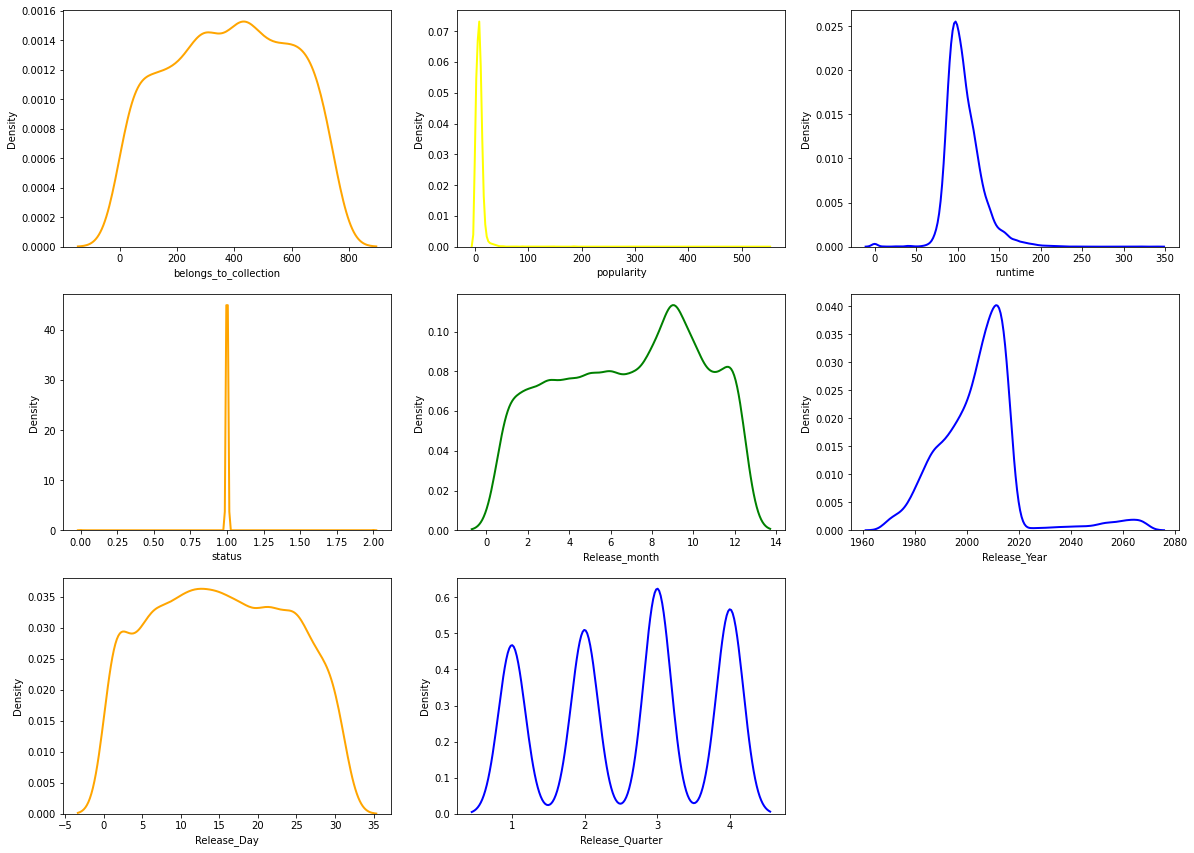

In [92]:
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)

Float_columns = [col for col in data if 'float' in str(data[col].dtypes)]
Float_columns.remove('revenue')
# Lets See the Distribution of Float columns Each of them
import seaborn as sns
plt.figure(figsize=(20,20))
color = ['red','green','blue','orange','pink','yellow']
for idx,col in enumerate(Float_columns):
    ax = plt.subplot(4,3,idx+1)
    color_idx = np.random.randint(0,len(color))
    Mean,Median = np.mean(data[col]),np.median(data[col])
    sns.kdeplot(data[col],ax=ax,color=color[color_idx],linewidth=2)

    
# Some of them are Skewed. Some of them are almost gaussian centered at their respective mean

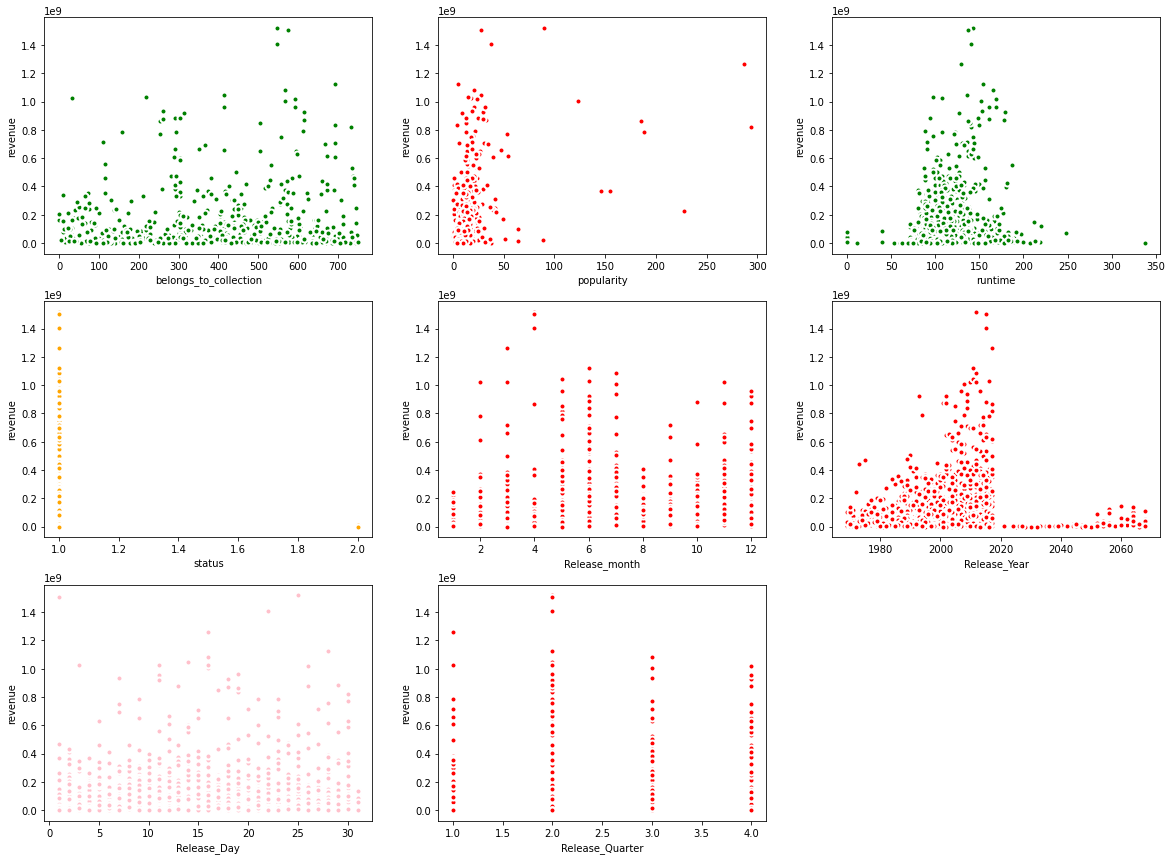

In [93]:
# Lets see how they are related to our target Variable
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)

# Lets See the Distribution of Each of them
import seaborn as sns
plt.figure(figsize=(20,20))
color = ['red','green','blue','orange','pink','yellow']
for idx,col in enumerate(Float_columns):
    ax = plt.subplot(4,3,idx+1)
    color_idx = np.random.randint(0,len(color))
    sns.scatterplot(data[col],data['revenue'],ax=ax,color=color[color_idx],linewidth=2)

    
# No Clear Correlation are Visible. Budget and revenue seems to be correlated

<AxesSubplot:>

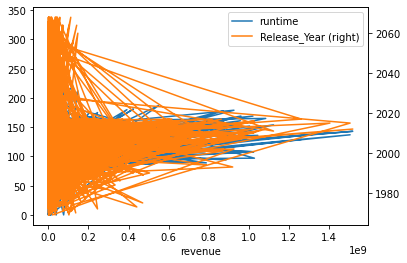

In [94]:
figure,ax = plt.subplots()
data.plot(x = "revenue",y = "runtime",ax = ax)
data.plot(x = "revenue",y = "Release_Year",ax = ax,secondary_y = True)

# It simply says at almost fixed runtime the revenue tends to increase similar argument for Release Year

<AxesSubplot:>

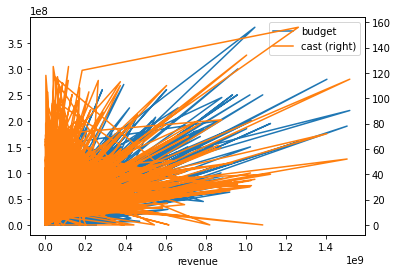

In [95]:
figure,ax = plt.subplots()
data.plot(x = "revenue",y = "budget",ax = ax)
data.plot(x = "revenue",y = "cast",ax = ax,secondary_y = True)

In [96]:
# Lets see Null values Again.
Null_Values = pd.DataFrame(data.isnull().sum()).rename(columns = {0:'Total'})
Null_Values['Percent'] = Null_Values['Total']/len(data)
Null_Values.sort_values('Percent',ascending=False).head(10)

,Total,Percent
belongs_to_collection,5917,0.799811
revenue,4398,0.594485
runtime,6,0.000811
status,2,0.000270
Release_month,1,0.000135
Release_Year,1,0.000135
Release_Day,1,0.000135
Release_Quarter,1,0.000135
popularity,0,0.000000
production_companies,0,0.000000


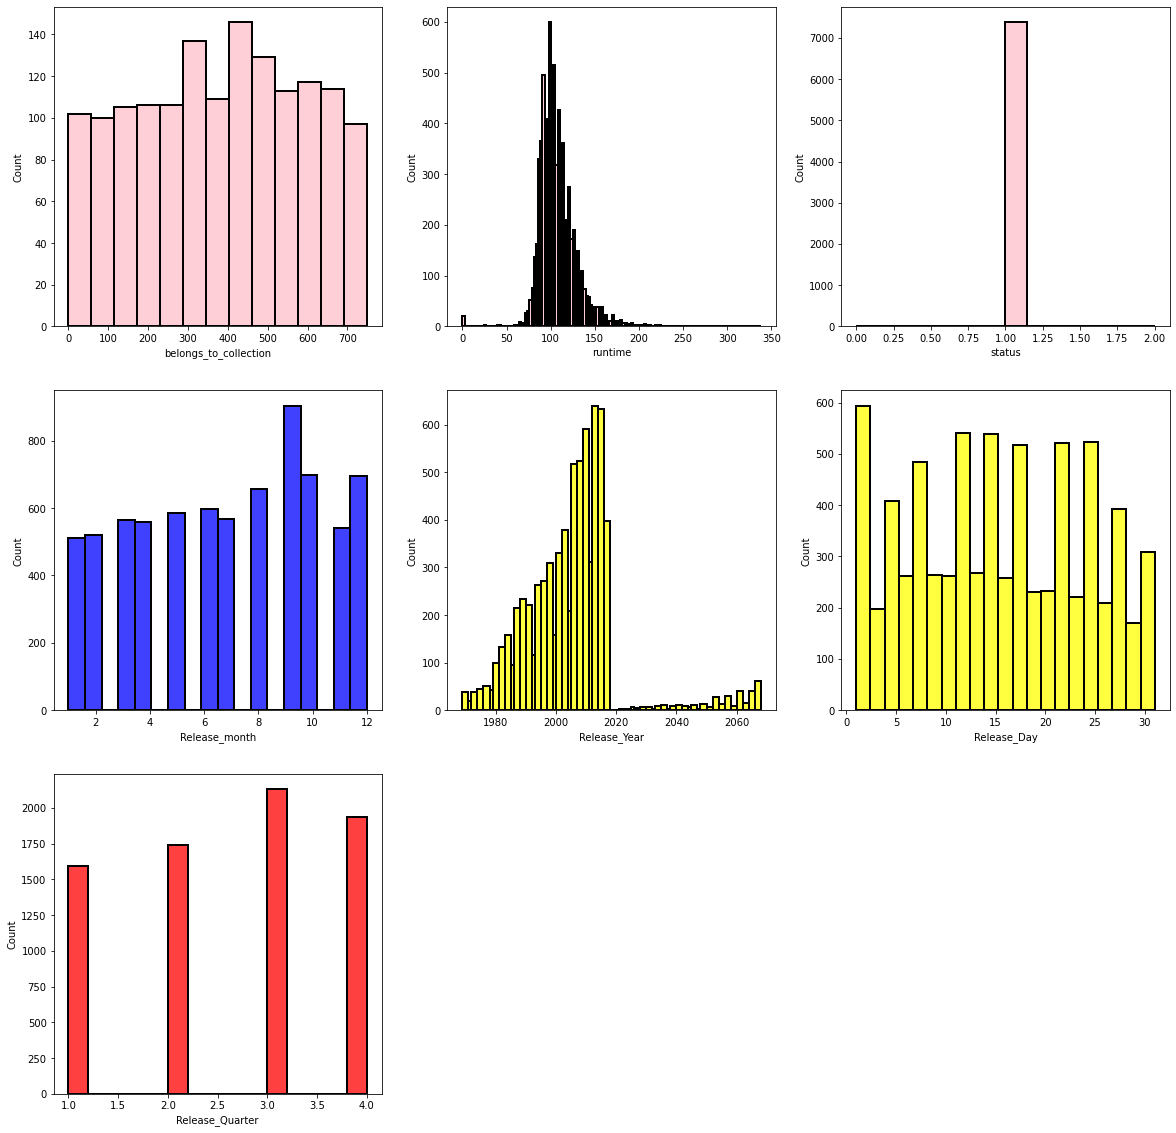

In [97]:
# Lets see what values we should Put in these
Null_Columns = list(Null_Values[Null_Values['Total'] >= 1].index)
Null_Columns.remove('revenue')
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)

# Lets See the Distribution of Each of them
import seaborn as sns
plt.figure(figsize=(20,20))
color = ['red','green','blue','orange','pink','yellow']
for idx,col in enumerate(Null_Columns):
    ax = plt.subplot(3,3,idx+1)
    color_idx = np.random.randint(0,len(color))
    sns.histplot(data[col],ax=ax,color=color[color_idx],linewidth=2)

# Lets fill them with the median Value 

In [98]:
# Lets Start Feature Engineering
# Lets first remove any redundant feature having correlation greater than 95%
Correlation_Matrix = data.corr()
Triu = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape),k = 1).astype(np.bool))  # Will return Upper triangle
Redundant_col = [col for col in Triu if np.any(Triu[col].abs() >= 0.95)]

In [99]:
data.drop(Redundant_col,axis = 1,inplace = True)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  1481 non-null   float16
 1   budget                 7398 non-null   int32  
 2   genres                 7398 non-null   int8   
 3   original_language      7398 non-null   int8   
 4   popularity             7398 non-null   float16
 5   production_companies   7398 non-null   int8   
 6   production_countries   7398 non-null   int8   
 7   runtime                7392 non-null   float16
 8   spoken_languages       7398 non-null   int8   
 9   status                 7396 non-null   float16
 10  Keywords               7398 non-null   int16  
 11  cast                   7398 non-null   int16  
 12  crew                   7398 non-null   int16  
 13  revenue                3000 non-null   float32
 14  Release_month          7397 non-null   float16
 15  Rele

In [101]:
from sklearn.preprocessing import StandardScaler
OriginalLabel = data.loc[data['revenue'].notnull(),'revenue']
Columns = data.columns

In [102]:
scaler = StandardScaler()  # Null values will remain np.nan so no problem there
data = scaler.fit_transform(data)
data = pd.DataFrame(data,columns=list(Columns))

In [103]:
# Lets Manually Create Some Features
import featuretools as ft
es = ft.EntitySet(id = 'TMDB')
es = es.entity_from_dataframe(entity_id="data_tmdb",dataframe=data,make_index=True,index = 'TMDB_id')

In [104]:
es

Entityset: TMDB
  Entities:
    data_tmdb [Rows: 7398, Columns: 18]
  Relationships:
    No relationships

In [105]:
es['data_tmdb'].variables

[<Variable: TMDB_id (dtype = index)>,
 <Variable: belongs_to_collection (dtype = numeric)>,
 <Variable: budget (dtype = numeric)>,
 <Variable: genres (dtype = numeric)>,
 <Variable: original_language (dtype = numeric)>,
 <Variable: popularity (dtype = numeric)>,
 <Variable: production_companies (dtype = numeric)>,
 <Variable: production_countries (dtype = numeric)>,
 <Variable: runtime (dtype = numeric)>,
 <Variable: spoken_languages (dtype = numeric)>,
 <Variable: status (dtype = numeric)>,
 <Variable: Keywords (dtype = numeric)>,
 <Variable: cast (dtype = numeric)>,
 <Variable: crew (dtype = numeric)>,
 <Variable: revenue (dtype = numeric)>,
 <Variable: Release_month (dtype = numeric)>,
 <Variable: Release_Year (dtype = numeric)>,
 <Variable: Release_Day (dtype = numeric)>]

In [106]:
feature_matrix,feature_dfs = ft.dfs(entityset=es,target_entity="data_tmdb",trans_primitives=["add_numeric","cum_mean","cum_sum","percentile"],max_depth=2)

In [107]:
feature_matrix.shape

(7398, 204)

In [108]:
Label = feature_matrix["revenue"]
Remove_col = []
for col in feature_matrix:
    if "revenue" in str(col):
        Remove_col.append(col)
Remove_col[:5]

['revenue',
 'Keywords + revenue',
 'Release_Day + revenue',
 'Release_Year + revenue',
 'Release_month + revenue']

In [109]:
feature_matrix.drop(Remove_col,axis = 1,inplace = True)

In [110]:
feature_matrix.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,...,PERCENTILE(cast),PERCENTILE(crew),PERCENTILE(genres),PERCENTILE(original_language),PERCENTILE(popularity),PERCENTILE(production_companies),PERCENTILE(production_countries),PERCENTILE(runtime),PERCENTILE(spoken_languages),PERCENTILE(status)
TMDB_id,,,,,,,,,,,,,,,,,,,,,
0,-0.477304,-0.232811,-1.336506,-0.276386,-0.159535,0.116834,-0.421094,-0.685206,-0.498819,-0.003506,...,0.744931,0.923898,0.103744,0.445661,0.428562,0.647743,0.390579,0.221050,0.361652,0.5
1,1.246753,0.470916,1.344479,-0.276386,-0.021780,-0.797807,-0.421094,0.245954,-0.498819,-0.003506,...,0.649703,0.302582,0.889700,0.445661,0.568735,0.184780,0.390579,0.678098,0.361652,0.5
2,NaN,-0.522421,-1.336506,-0.276386,4.586742,0.116834,-0.421094,-0.126510,-0.498819,-0.003506,...,0.939308,0.907475,0.103744,0.445661,0.996756,0.647743,0.390579,0.523742,0.361652,0.5
3,NaN,-0.579260,-0.442844,0.857356,-0.438897,-1.255127,-0.421094,0.664976,0.619443,-0.003506,...,0.097662,0.104690,0.365099,0.924642,0.212625,0.028048,0.390579,0.805330,0.804001,0.5
4,NaN,-0.611740,-0.442844,2.369013,-0.605552,-1.255127,-0.421094,0.478744,-0.498819,-0.003506,...,0.029738,0.055218,0.365099,0.957015,0.091714,0.028048,0.390579,0.752773,0.361652,0.5


In [111]:
Correlation_Matrix = feature_matrix.corr()
Triu = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape),k = 1).astype(np.bool))  # Will return Upper triangle
Redundant_col = [col for col in Triu if np.any(Triu[col].abs() >= 0.95)]

In [112]:
feature_matrix.drop(Redundant_col,axis = 1,inplace = True)

In [113]:
feature_matrix.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,...,PERCENTILE(Release_Year),PERCENTILE(budget),PERCENTILE(cast),PERCENTILE(crew),PERCENTILE(original_language),PERCENTILE(popularity),PERCENTILE(production_companies),PERCENTILE(production_countries),PERCENTILE(runtime),PERCENTILE(spoken_languages)
TMDB_id,,,,,,,,,,,,,,,,,,,,,
0,-0.477304,-0.232811,-1.336506,-0.276386,-0.159535,0.116834,-0.421094,-0.685206,-0.498819,-0.003506,...,0.876774,0.597391,0.744931,0.923898,0.445661,0.428562,0.647743,0.390579,0.221050,0.361652
1,1.246753,0.470916,1.344479,-0.276386,-0.021780,-0.797807,-0.421094,0.245954,-0.498819,-0.003506,...,0.449236,0.821371,0.649703,0.302582,0.445661,0.568735,0.184780,0.390579,0.678098,0.361652
2,NaN,-0.522421,-1.336506,-0.276386,4.586742,0.116834,-0.421094,-0.126510,-0.498819,-0.003506,...,0.834054,0.402338,0.939308,0.907475,0.445661,0.996756,0.647743,0.390579,0.523742,0.361652
3,NaN,-0.579260,-0.442844,0.857356,-0.438897,-1.255127,-0.421094,0.664976,0.619443,-0.003506,...,0.746519,0.338605,0.097662,0.104690,0.924642,0.212625,0.028048,0.390579,0.805330,0.804001
4,NaN,-0.611740,-0.442844,2.369013,-0.605552,-1.255127,-0.421094,0.478744,-0.498819,-0.003506,...,0.623293,0.136794,0.029738,0.055218,0.957015,0.091714,0.028048,0.390579,0.752773,0.361652


In [114]:
feature_matrix['revenue'] = Label
del Label

In [115]:
Train = feature_matrix.loc[feature_matrix['revenue'].notnull(),:]
Test = feature_matrix.loc[feature_matrix['revenue'].isnull(),:]

In [116]:
Label = OriginalLabel
Train.drop(['revenue'],inplace = True,axis = 1)
Test.drop(['revenue'],inplace = True,axis = 1)

In [117]:
Features = Train.columns

In [118]:
# Lets start Machine Learning From Here
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,make_scorer
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features,
#would get a R^2 score of 0.0.

imputer = SimpleImputer(strategy="median")
score_fn = make_scorer(r2_score,greater_is_better=True)

In [2]:
Train = imputer.fit_transform(Train)
Test = imputer.transform(Test)

NameError: name 'imputer' is not defined

In [120]:
Label = Label.values

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
from sklearn.ensemble import RandomForestRegressor   # Our Base Model 
from sklearn.model_selection import cross_val_score

RandomForest = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
cv_score = cross_val_score(RandomForest,Train,Label,cv = 10,scoring=score_fn)

In [123]:
print("10 Fold Cross Validation Mean R2_SCORE: {0} with Deviation: {1}".format(round(np.mean(cv_score),3),round(cv_score.std(),3)))

10 Fold Cross Validation Mean R2_SCORE: 0.631 with Deviation: 0.122


In [124]:
RandomForest.fit(Train,Label)
feature_importance = pd.DataFrame({'Features':Features,'Importance':RandomForest.feature_importances_})

In [125]:
def Plot_Importance(df,count = 5,threshold = 0.95):
    df['Importance'] = df['Importance']/df['Importance'].sum()
    df = df.sort_values('Importance',ascending = False).reset_index(drop = True)
    
    df['cum_sum'] = np.cumsum(df['Importance'])
    
    # Plotting Values
    df.loc[:count,:].plot(kind = 'barh',x = 'Features',y = 'Importance',color = 'green',
                          edgecolor = 'blue',figsize = (5,5),linewidth = 2)
    plt.xlabel("Normalized Importance")
    plt.xscale("log")
    plt.gca().invert_yaxis()
    
    plt.show()
    
    if threshold:
        min_ = np.min(np.where(df['cum_sum'] > threshold))
        plt.xlabel('# Features', size = 10)
        plt.ylabel('Cumulative Importance', size = 10)
        plt.title('Cumulative Importance of Features', size = 10)
        plt.plot(np.arange(len(df)),df['cum_sum'],color = 'red')
        plt.vlines(min_ + 1,ymin = 0,ymax = 1,color = 'black',linestyles='dotted')
        plt.show()
        print('Number of Columns required for {0} threshold is: {1}'.format(threshold,min_+1))
    return df

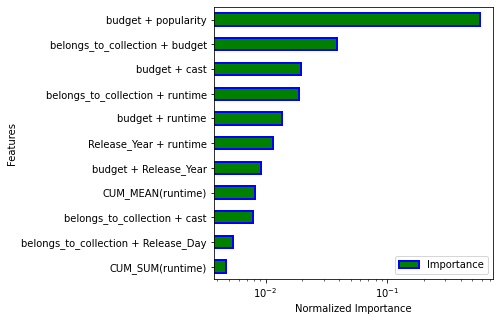

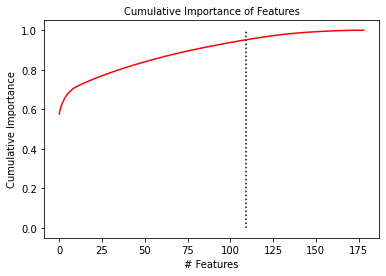

Number of Columns required for 0.95 threshold is: 109


In [126]:
feature_importance = Plot_Importance(feature_importance,count=10)

In [127]:
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore',category=ConvergenceWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

Result = pd.DataFrame(columns = ['Model','CV_Mean','CV_Std'])

def Check_Model(Model,Name,cv = 10,WantResult = True):
    
    global Result
    cv_score = cross_val_score(Model,Train,Label,cv = cv,scoring=score_fn)
    print("10 Fold Cross Validation Mean R2_SCORE: {0} with Deviation: {1}".format(round(cv_score.mean(),3),round(cv_score.std(),3)))
    
    if WantResult:
        Result = Result.append(pd.DataFrame({'Model':Name,'CV_Mean':round(np.mean(cv_score),3),'CV_Std':round(np.std(cv_score),3)},index = [0]),ignore_index=True)
        return Result

In [128]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import LinearSVR,SVR
from sklearn.neural_network import MLPRegressor

forest_regressor = RandomForestRegressor(n_estimators = 100,n_jobs = -1,random_state=42)
L_Regress = LinearRegression()
Log_Regress = LogisticRegression(n_jobs = -1)
L_SVR = LinearSVR()
N_SVR = SVR()
MLP_Regressor = MLPRegressor(hidden_layer_sizes=[100,100,100],early_stopping=True)

In [129]:
Result = Check_Model(forest_regressor,"RandomForest",WantResult=True)

10 Fold Cross Validation Mean R2_SCORE: 0.631 with Deviation: 0.122


In [130]:
Result = Check_Model(L_Regress,"LinearRegression",WantResult=True)

10 Fold Cross Validation Mean R2_SCORE: -0.62 with Deviation: 3.61


In [131]:
Result = Check_Model(Log_Regress,"LogistikRegression",WantResult=True)

10 Fold Cross Validation Mean R2_SCORE: -0.03 with Deviation: 0.255


In [132]:
Result = Check_Model(L_SVR,"LinearSVR",WantResult=True)

10 Fold Cross Validation Mean R2_SCORE: -0.195 with Deviation: 0.039


In [133]:
Result = Check_Model(N_SVR,"SVR",WantResult=True)

10 Fold Cross Validation Mean R2_SCORE: -0.136 with Deviation: 0.017


In [134]:
Result = Check_Model(MLP_Regressor,"MLPRegressor",WantResult=True)

10 Fold Cross Validation Mean R2_SCORE: 0.593 with Deviation: 0.106


In [135]:
Result.set_index("Model",inplace = True)

(-2.0, 10.0, -2.0, 10.0)

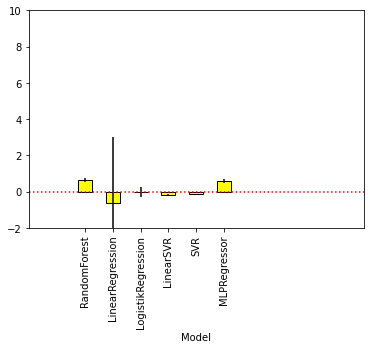

In [136]:
Result["CV_Mean"].plot(kind = "bar",edgecolor = "black",color = "yellow",yerr = list(Result["CV_Std"]))
plt.hlines(0,xmin = -2,xmax = 10,color = "red",linestyles="dotted")
plt.axis([-2,10,-2,10])

# Only Random Forest and MLP Classifier seems to do good

In [137]:
#Hyperparameter optimization for Random Forest

from hyperopt import STATUS_OK

def Objective_function(params):
    
    model = RandomForestRegressor(**params,n_jobs = -1)
    cvscore = cross_val_score(model,Train,Label,cv = 10,scoring=score_fn)
    score = 1 - np.mean(cvscore)
    return {"loss":score,'params':params,"status":STATUS_OK}

In [138]:
# Domain Space
from hyperopt import hp
space = {
    'n_estimators':hp.choice('n_estimators',range(10,1000)),
    'max_depth':hp.choice('max_depth',range(1,50)),
    'max_features':hp.choice('max_features',['auto','sqrt','log2']),
    'max_leaf_nodes':hp.choice('max_leaf_nodes',range(10,150)),
    'min_samples_split':hp.choice('min_samples_split',range(2,100)),
    'max_leaf_nodes':hp.choice('max_leaf_nodes',[None,2,5,10,15,20,25,50,100])
}

In [139]:
from hyperopt import Trials

bayes_trials = Trials()

In [140]:
from hyperopt import fmin,tpe

best = fmin(Objective_function,space,max_evals=50,trials=bayes_trials,algo = tpe.suggest)

100%|██████████| 50/50 [42:47<00:00, 51.36s/trial, best loss: 0.3309854293978679]    


In [141]:
# Lets Optimize MLP Classifier

def MLPObjectiveFunction(params):
    model = MLPRegressor(**params,early_stopping=True)
    cvscore = cross_val_score(model,Train,Label,cv = 10,scoring=score_fn)
    score = 1 - np.mean(cvscore)
    return {"loss":score,'params':params,"status":STATUS_OK}

In [142]:
MLP_space = {
    'hidden_layer_sizes':hp.choice('hidden_layer_sizes',[100,[100,100],[100,100,100],[100,100,100,100]]),
    'activation':hp.choice('activation',['identity', 'logistic', 'tanh', 'relu']),
    'alpha':hp.choice('alpha',np.linspace(0.0001,1,num=1000)),
    'learning_rate':hp.choice('learning_rate',['constant','adaptive','invscaling']),
    'learning_rate_init':hp.choice('learning_rate_init',np.linspace(0.001,1,1000))
}

In [143]:
MLP_Trial = Trials()

In [144]:
MLP_best = fmin(MLPObjectiveFunction,MLP_space,max_evals=50,trials=MLP_Trial,algo = tpe.suggest)

100%|██████████| 50/50 [18:22<00:00, 22.05s/trial, best loss: 0.37365995951784803]


In [145]:
from hyperopt import space_eval
params = space_eval(space,best)    # These are the best parameters for Random Forest

In [146]:
params

{'max_depth': 16,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_split': 4,
 'n_estimators': 268}

In [147]:
Best_model = RandomForestRegressor(**params,n_jobs = -1)

In [148]:
cvscore = cross_val_score(Best_model,Train,Label,cv = 10,n_jobs = -1)
print("10 Fold Cross Validation Mean R2_SCORE: {0} with Deviation: {1}".format(round(np.mean(cv_score),3),round(cv_score.std(),3)))

10 Fold Cross Validation Mean R2_SCORE: 0.631 with Deviation: 0.122


In [149]:
# Lets use Gradient boosting as see how it works we will use lightgbm implementation

import lightgbm as lgb
import numpy as np

def Objective_function_lgn(params):
        
    boost_type = params['boosting_type']['boosting_type']
    del params['boosting_type']
    params['boosting_type'] = boost_type

    model = lgb.LGBMRegressor(**params,n_jobs = -1)
    score = cross_val_score(model,Train,Label,cv = 10,scoring=score_fn)
    loss = 1 - np.mean(score)
    return {'loss':loss,'params':params,'status':STATUS_OK}

In [150]:
from hyperopt import hp,Trials,fmin,tpe
space = {
        'class_weight': hp.choice('class_weight', [None, 'balanced']),
        'boosting_type': hp.choice('boosting_type',
                                   [{'boosting_type': 'gbdt'},                                     
                                    {'boosting_type': 'dart'},
                                    {'boosting_type': 'goss'}]),
        'num_leaves': hp.choice('num_leaves', np.arange(30, 150)),
        'subsample_for_bin': hp.choice('subsample_for_bin', np.arange(20000, 300000)),
        'feature_fraction': hp.choice('feature_fraction', np.random.rand(1,1000)),
        'bagging_fraction': hp.choice('bagging_fraction', np.random.rand(1,1000)), 
        'lambda_l1': hp.choice('lambda_l1', [0, hp.loguniform('lambda_l1_positive', -16, 2)]),
        'lambda_l2': hp.choice('lambda_l2', [0, hp.loguniform('lambda_l2_positive', -16, 2)]),
        'min_child_samples': hp.choice('min_child_samples', np.arange(20, 500)),
        'reg_alpha': hp.choice('reg_alpha', np.random.rand(1,1000)),
        'reg_lambda': hp.choice('reg_lambda', np.random.rand(1,1000)),
        'colsample_bytree': hp.choice('colsample_by_tree', np.random.rand(1,1000)),
        'objective': "regression",
        'n_estimators': hp.choice('n_estimator',np.arange(10,1000)),
    }

In [151]:
lgbm_trial = Trials()

In [1]:
GBM_best = fmin(Objective_function_lgn,space,max_evals=200,trials=lgbm_trial,algo = tpe.suggest)

NameError: name 'fmin' is not defined